# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

In [1]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):
    x = np.array([x1,x2])
    w = np.array([1, 1])
    theta = -1.5
    val = sum(w*x)+theta
    if val >= 0 :
        return 1
    else :
        return 0
    
def NAND(x1, x2):
    return -AND(x1, x2)


def OR(x1, x2):
    x = np.array([x1,x2])
    w = np.array([1, 1])
    theta = -0.5
    val = sum(w*x)+theta
    if val >= 0 :
        return 1
    else :
        return 0

# 위 논리 게이트를 조합하여 XOR gate 구현해주세요
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, x2)
    return y

## 활성함수 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(int)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


In [3]:
# STEP 함수 구현
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


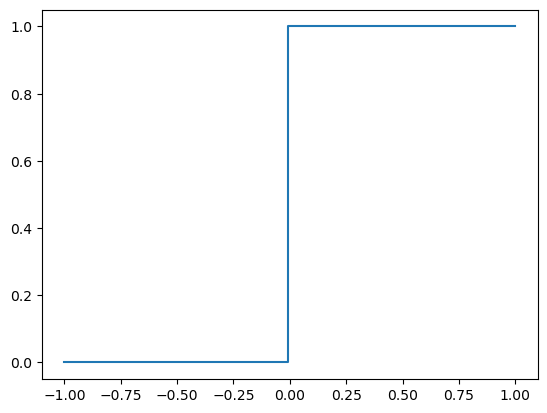

In [4]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


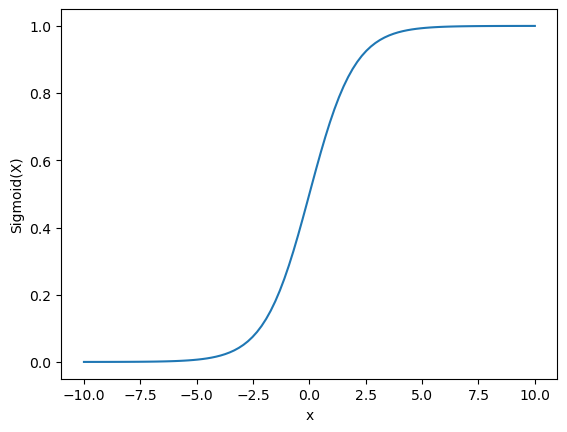

In [5]:
# Sigmoid 함수 구현
def sigmoid(x):
    p = 1/(1+np.exp(-x))    
    return p


x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

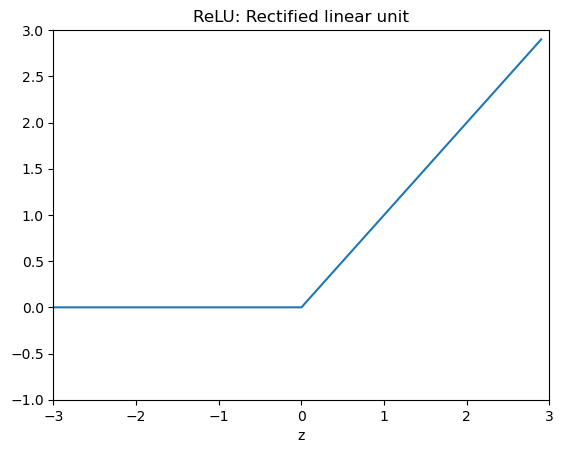

<Figure size 640x480 with 0 Axes>

In [6]:
# ReLU 함수 구현
def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-3, 3, .1)
y = ReLU(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [115]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [116]:
# 순전파 함수 정의
def forward(network, x):
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['B1'], network['B2']

 # 아래 빈칸 채워주세요
    z1 = np.dot(x, W1)+b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2)+b2
    a2 = sigmoid(z2)

    y = a2
    return y

In [117]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.69414301 0.85787961]


## 직접 신경망 만들어보기

In [129]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(405)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [130]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
#위에서 구현한 코드 그대로
    p = 1/(1+np.exp(-net))    
    return p


# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig*(1-sig)

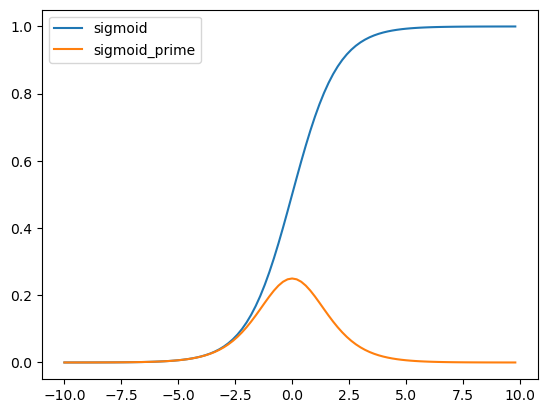

In [131]:
# 시그모이드 함수가 잘 생성되었는지 그래프를 출력해봅시다.
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

In [132]:
# 초기 가중치
W = np.array([0.40316676, -0.44345216])
W = W.reshape(2,1)

# 입력 데이터와 가중치 연산
Z = np.matmul(X, W)+b            #Feedforward 연산 참고하여 코드 작성

"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""

'\narray([[1.        ],\n       [0.55654784],\n       [1.40316676],\n       [0.9597146 ]])\n'

In [133]:
Z

array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])

In [134]:
# A: 출력(activated outputs)
A = sigmoid(Z)

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""

'\narray([[0.73105858],\n       [0.6356534 ],\n       [0.80268592],\n       [0.72306466]])\n'

In [135]:
A

array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])

## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [136]:
def backpropagation(Y, A, Z):
    da = A-Y
    dz = da*sigmoid_prime(Z)
    dw = np.matmul(X.T, dz)
    db = np.dot(np.ones(shape=(1,4)), dzz)
    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")
    return dw,db

In [137]:
print("기존 가중치: \n", W, "\n")

기존 가중치: 
 [[ 0.40316676]
 [-0.44345216]] 



In [138]:
# 가중치 업데이트(batch)
dw, db = backpropagation(Y, A, Z)

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 [[-0.02735214]] 



In [139]:
W = W - 0.1*dw
b = b - 0.1*db

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

업데이트 후 가중치: 
 [[ 0.41183726]
 [-0.42946855]] 

업데이트 후 bias: 
 [[1.00273521]] 



- learning rate는 0.1로 임의로 설정하였음.

In [140]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
W = np.array(W).reshape(2,1)
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트 10,000회 (10,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = Z = np.matmul(X, W)+b 
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    dw, db = backpropagation(Y, A, Z)

    W = W - 0.1*dw
    b = b - 0.1*db

print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""
학습 후 가중치:
 [[5.92060487]
 [5.92082351]]

학습 후 bias:
 [[-2.59025899]]

학습 후 예측값:
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]
"""

학습 전 가중치: 
 [[-0.79003947]
 [ 0.6826574 ]]
dz : 
 [[ 0.125     ]
 [-0.07485244]
 [-0.14769035]
 [-0.131326  ]] 

dw : 
 [[-0.27901635]
 [-0.20617843]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.12517072]
 [-0.07312331]
 [-0.14793315]
 [-0.12840589]] 

dw : 
 [[-0.27633903]
 [-0.2015292 ]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.12534096]
 [-0.07144228]
 [-0.14808482]
 [-0.12534935]] 

dw : 
 [[-0.27343417]
 [-0.19679163]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.12551074]
 [-0.06981015]
 [-0.14814648]
 [-0.12218136]] 

dw : 
 [[-0.27032785]
 [-0.19199152]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.12568004]
 [-0.06822739]
 [-0.14811973]
 [-0.11892623]] 

dw : 
 [[-0.26704596]
 [-0.18715363]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.12584886]
 [-0.06669414]
 [-0.14800657]
 [-0.11560718]] 

dw : 
 [[-0.26361376]
 [-0.18230132]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.1260172 ]
 [-0.06521022]
 [-0.14780944]
 [-0.1122461 ]] 

dw : 
 [[-0.26005553]
 [-0.17745632]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.

dz : 
 [[ 0.14809984]
 [-0.00732811]
 [-0.0171059 ]
 [-0.00089845]] 

dw : 
 [[-0.01800435]
 [-0.00822655]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14810794]
 [-0.00728311]
 [-0.01698395]
 [-0.0008893 ]] 

dw : 
 [[-0.01787325]
 [-0.00817241]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.1481153 ]
 [-0.00723843]
 [-0.01686309]
 [-0.00088028]] 

dw : 
 [[-0.01774337]
 [-0.00811871]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14812192]
 [-0.00719407]
 [-0.01674331]
 [-0.00087138]] 

dw : 
 [[-0.01761469]
 [-0.00806545]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14812778]
 [-0.00715003]
 [-0.0166246 ]
 [-0.0008626 ]] 

dw : 
 [[-0.0174872 ]
 [-0.00801263]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14813291]
 [-0.0071063 ]
 [-0.01650695]
 [-0.00085393]] 

dw : 
 [[-0.01736088]
 [-0.00796023]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14813729]
 [-0.00706288]
 [-0.01639034]
 [-0.00084538]] 

dw : 
 [[-0.01723571]
 [-0.00790826]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14814093]
 [-0.00701977]
 [-0.01627475]
 [-

 [[ 0.14215208]
 [-0.00317719]
 [-0.00677548]
 [-0.00026388]] 

dw : 
 [[-0.00703936]
 [-0.00344107]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14206467]
 [-0.00315938]
 [-0.00673501]
 [-0.00026194]] 

dw : 
 [[-0.00699695]
 [-0.00342132]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14197671]
 [-0.00314167]
 [-0.00669481]
 [-0.00026002]] 

dw : 
 [[-0.00695483]
 [-0.00340168]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14188819]
 [-0.00312407]
 [-0.00665488]
 [-0.00025811]] 

dw : 
 [[-0.00691299]
 [-0.00338218]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14179912]
 [-0.00310657]
 [-0.00661522]
 [-0.00025622]] 

dw : 
 [[-0.00687144]
 [-0.00336279]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.1417095 ]
 [-0.00308917]
 [-0.00657582]
 [-0.00025435]] 

dw : 
 [[-0.00683017]
 [-0.00334352]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14161933]
 [-0.00307188]
 [-0.00653669]
 [-0.00025249]] 

dw : 
 [[-0.00678918]
 [-0.00332438]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 0.14152861]
 [-0.0030547 ]
 [-0.00649782]
 [-0.0002

dz : 
 [[ 1.00696310e-01]
 [-6.30756004e-04]
 [-1.28677317e-03]
 [-3.99084984e-05]] 

dw : 
 [[-0.00132668]
 [-0.00067066]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 1.00531932e-01]
 [-6.27364762e-04]
 [-1.27981546e-03]
 [-3.96771365e-05]] 

dw : 
 [[-0.00131949]
 [-0.00066704]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 1.00367560e-01]
 [-6.23991824e-04]
 [-1.27289599e-03]
 [-3.94471940e-05]] 

dw : 
 [[-0.00131234]
 [-0.00066344]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 1.00203196e-01]
 [-6.20637091e-04]
 [-1.26601456e-03]
 [-3.92186613e-05]] 

dw : 
 [[-0.00130523]
 [-0.00065986]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 1.00038842e-01]
 [-6.17300461e-04]
 [-1.25917094e-03]
 [-3.89915290e-05]] 

dw : 
 [[-0.00129816]
 [-0.00065629]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 9.98744985e-02]
 [-6.13981836e-04]
 [-1.25236491e-03]
 [-3.87657874e-05]] 

dw : 
 [[-0.00129113]
 [-0.00065275]] 

db : 
 [[-0.02735214]] 

dz : 
 [[ 9.97101674e-02]
 [-6.10681117e-04]
 [-1.24559626e-03]
 [-3.85414275e-05]] 

dw : 
 [

'\n학습 후 가중치:\n [[5.92060487]\n [5.92082351]]\n\n학습 후 bias:\n [[-2.59025899]]\n\n학습 후 예측값:\n [[0.07 ]\n [0.965]\n [0.965]\n [1.   ]]\n'

## IRIS DATA PERCEPTRON 학습예제

In [141]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

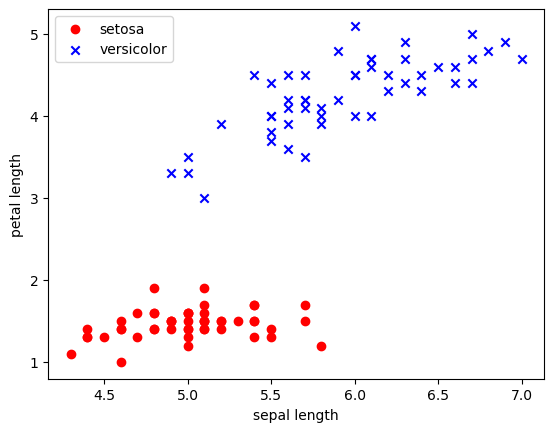

In [170]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
y
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""

# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
y
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""

# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
X.shape
"""
(100, 2)
"""

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

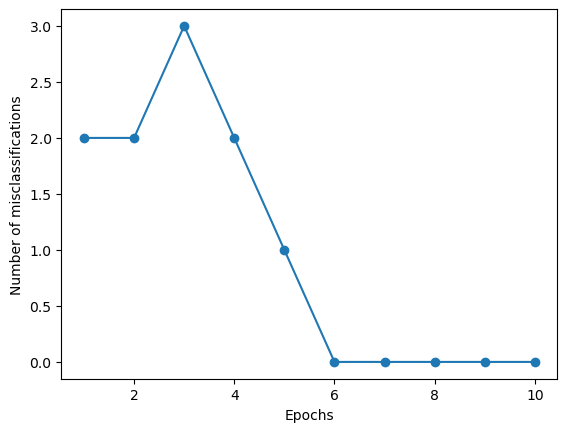

In [171]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w    # self.weight[0]이 bias
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """
        입력값을 받아 가중치, 편향과 연산해줍니다.
        """
        return np.matmul(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

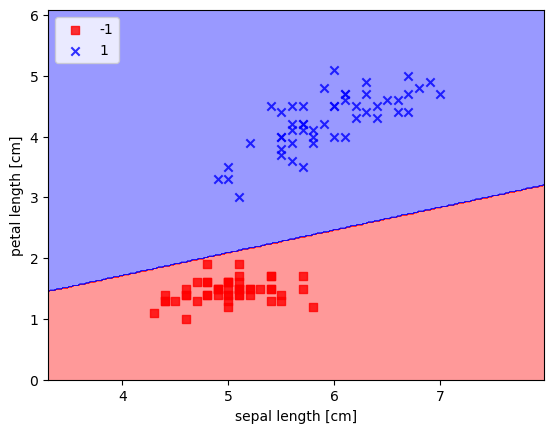

In [172]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다